# Dataset: Communities and crime

El dataset contiene información socio-económica de varias comunidades en los Estados Unidos, en los años 90. Se busca estimar la variable `ViolentCrimesPerPop`, la cual indica la cantidad total de crímenes violentos en una comunidad dada, por cada $100000$ habitantes.

Se importan librerías y se leen los datos. Se crean dataframes `X`, con posibles variables de entrada, y `y`, con variable objetivo.

In [99]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [5]:

variables = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop'
]
data = pd.read_csv('Communites and crime dataset.csv', na_values='?', header=None, names=variables, index_col=3).dropna(axis=1)
X = data.drop(columns = ['state', 'fold','ViolentCrimesPerPop'])
y = data['ViolentCrimesPerPop']

In [7]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
communityname,,,,,,,,,,,,,,,,,,,,,
Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32
Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00
Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00
Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00
Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00


## Modelos de Regresión multiple

### Regresión Lineal multiple

In [84]:
lmodel = smf.ols('ViolentCrimesPerPop ~ medIncome + perCapInc + PctYoungKids2Par + PctTeen2Par + RentMedian + TotalPctDiv + PctNotHSGrad + PctOccupMgmtProf + FemalePctDiv*MalePctDivorce + NumIlleg*NumImmig', data=data).fit()
print(lmodel.summary())

OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.578
Model:                             OLS   Adj. R-squared:                  0.575
Method:                  Least Squares   F-statistic:                     193.9
Date:                 Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                         21:04:46   Log-Likelihood:                 936.97
No. Observations:                 1994   AIC:                            -1844.
Df Residuals:                     1979   BIC:                            -1760.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.314

### Lasso

In [95]:
Pred = data[['medIncome','perCapInc','PctYoungKids2Par','PctTeen2Par','RentMedian','TotalPctDiv','PctNotHSGrad','PctOccupMgmtProf','FemalePctDiv','MalePctDivorce','NumIlleg','NumImmig']]
X_train,X_test, Y_train, Y_test = train_test_split(Pred,y, test_size=0.25, random_state = 42) 
model_lasso = Lasso(alpha= 0.001).fit(X_train,Y_train)
print(model_lasso.coef_)

[ 0.          0.         -0.33859643 -0.26602464  0.14838932  0.
  0.15677762  0.          0.15753262  0.01475872  0.30496672  0.08001975]


In [101]:
Y_pred = model_lasso.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.021682180911012507

### Ridge

In [107]:
model_ridge = Ridge(alpha = 0.1).fit(X_train,Y_train)
print(model_ridge.coef_)

[ 0.13826554 -0.19399825 -0.32998903 -0.27774484  0.17621781 -0.57398761
  0.26799635  0.18459684  0.451912    0.40205124  0.30163125  0.14515067]


In [108]:
Y_pred = model_ridge.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.021298965671372176

### Lasso con validación cruzada

In [113]:
alphas = 10**np.linspace(1,-5,100)
model_lassocv = LassoCV(alphas=alphas,cv = 5, max_iter=1000).fit(X_train,Y_train)
model_lassocv.alpha_

1e-05

In [114]:
Y_pred = model_lassocv.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.021344576276101746

### Ridge con validación cruzada

In [116]:
alphas = 10**np.linspace(10,-2,100)
model_ridgecv = RidgeCV(alphas=alphas,cv=5,scoring='neg_mean_squared_error').fit(X_train,Y_train)
model_ridgecv.alpha_

0.013219411484660288

In [117]:
Y_pred = model_ridgecv.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.021393101136265295

### Lasso utilizando la mayoria de variables del dataset y validación cruzada

In [128]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state = 42) 
alphas = 10**np.linspace(10,-5,100)
model_lassocv = LassoCV(alphas=alphas,cv = 5, max_iter=10000).fit(X_train,Y_train)
model_lassocv.coef_

array([-0.        ,  0.0021636 ,  0.20744511, -0.        , -0.00118555,
        0.        , -0.        , -0.0542607 , -0.        ,  0.        ,
       -0.03166334,  0.02952671,  0.        , -0.        ,  0.01377346,
       -0.14015342,  0.09282108, -0.        , -0.06642057,  0.        ,
       -0.        , -0.05424389, -0.        , -0.01993309,  0.03295419,
        0.04413807, -0.        , -0.11255698, -0.04890806,  0.        ,
       -0.        , -0.05579258,  0.        , -0.04903966, -0.        ,
        0.        , -0.        ,  0.14729727,  0.04687855, -0.        ,
       -0.        ,  0.        , -0.        , -0.09195924, -0.10346984,
       -0.        , -0.        , -0.09901371, -0.04852102,  0.20696233,
       -0.02437136,  0.03148468, -0.03223739, -0.        , -0.        ,
        0.        ,  0.        ,  0.01990181,  0.        , -0.01921498,
       -0.        , -0.        , -0.01887743,  0.01354928, -0.        ,
        0.        , -0.05151235,  0.09696394,  0.        , -0.00

In [129]:
model_lassocv.alpha_

0.00016297508346206402

In [130]:
Y_pred = model_lassocv.predict(X_test)
mean_squared_error(Y_test,Y_pred)

0.016934194414976917

## Ajustes polinómicos y splines naturales

Variable perCapInc: Ingresos per capita.

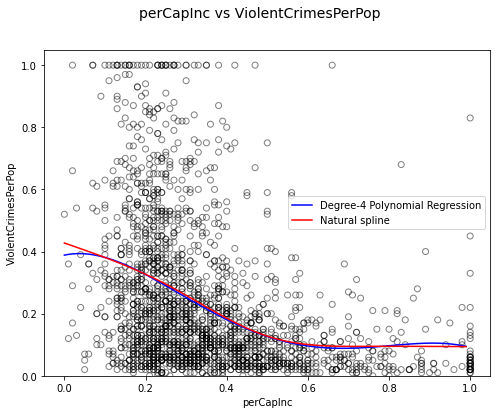

In [2]:
var = 'perCapInc'#'medIncome'
deg = 4
degf = 5
X_extend = PolynomialFeatures(degree=deg).fit_transform(X[[var]])
poly = sm.GLS(y, X_extend).fit()
transformed = dmatrix("cr(x, df=degf)", {"x": X[[var]],"degf":degf}, return_type='dataframe')
spln = sm.GLM(y, transformed).fit()
grid = np.arange(X[var].min(), X[var].max(),0.01).reshape(-1,1)

X_test = PolynomialFeatures(deg).fit_transform(grid)

y_pred_poly = poly.predict(X_test)
y_pred_spln = spln.predict(dmatrix("cr(grid, df=degf)", {"grid": grid,"degf":degf}, return_type='dataframe'))

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle(var+' vs ViolentCrimesPerPop', fontsize=14)

plt.scatter(X[var], y, facecolor='None', edgecolor='k', alpha=0.5)
plt.plot(grid, y_pred_poly, color = 'b', label='Degree-'+str(deg)+' Polynomial Regression')
plt.plot(grid, y_pred_spln, color='r', label='Natural spline')
ax.set_ylim(ymin=0)
plt.xlabel(var)
plt.ylabel('ViolentCrimesPerPop')
plt.legend()
plt.show()

Variable PctNotHSGrad: Porcentaje de individuos mayores de 25 años que no se han graduado de la secundaria

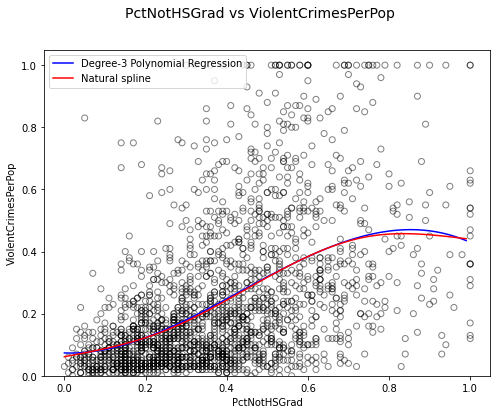

In [3]:
var = 'PctNotHSGrad'
deg = 3
degf = 5
X_extend = PolynomialFeatures(degree=deg).fit_transform(X[[var]])
poly = sm.GLS(y, X_extend).fit()
transformed = dmatrix("cr(x, df=degf)", {"x": X[[var]],"degf":degf}, return_type='dataframe')
spln = sm.GLM(y, transformed).fit()
grid = np.arange(X[var].min(), X[var].max(),0.01).reshape(-1,1)

X_test = PolynomialFeatures(deg).fit_transform(grid)

y_pred_poly = poly.predict(X_test)
y_pred_spln = spln.predict(dmatrix("cr(grid, df=degf)", {"grid": grid,"degf":degf}, return_type='dataframe'))

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle(var+' vs ViolentCrimesPerPop', fontsize=14)

plt.scatter(X[var], y, facecolor='None', edgecolor='k', alpha=0.5)
plt.plot(grid, y_pred_poly, color = 'b', label='Degree-'+str(deg)+' Polynomial Regression')
plt.plot(grid, y_pred_spln, color='r', label='Natural spline')
ax.set_ylim(ymin=0)
plt.xlabel(var)
plt.ylabel('ViolentCrimesPerPop')
plt.legend()
plt.show()

Variable PctImmigRec10: Porcentaje de inmigrantes que han llegado en los últimos 10 años

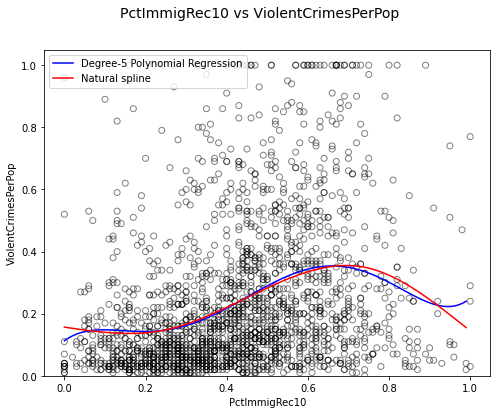

In [4]:
var = 'PctImmigRec10'
deg = 5
degf = 5
X_extend = PolynomialFeatures(degree=deg).fit_transform(X[[var]])
poly = sm.GLS(y, X_extend).fit()
transformed = dmatrix("cr(x, df=degf)", {"x": X[[var]],"degf":degf}, return_type='dataframe')
spln = sm.GLM(y, transformed).fit()
grid = np.arange(X[var].min(), X[var].max(),0.01).reshape(-1,1)

X_test = PolynomialFeatures(deg).fit_transform(grid)

y_pred_poly = poly.predict(X_test)
y_pred_spln = spln.predict(dmatrix("cr(grid, df=degf)", {"grid": grid,"degf":degf}, return_type='dataframe'))

fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle(var+' vs ViolentCrimesPerPop', fontsize=14)

plt.scatter(X[var], y, facecolor='None', edgecolor='k', alpha=0.5)
plt.plot(grid, y_pred_poly, color = 'b', label='Degree-'+str(deg)+' Polynomial Regression')
plt.plot(grid, y_pred_spln, color='r', label='Natural spline')
ax.set_ylim(ymin=0)
plt.xlabel(var)
plt.ylabel('ViolentCrimesPerPop')
plt.legend()
plt.show()

Observaciones: En primer lugar, se evidencia que ambos métodos de regresión (regresión polinómica y spline natural) presentan resultados muy similares en los 3 casos analizados. No obstante, el grado de los polinomios tuvo que ser ajustado manualmente luego de varios intentos, para evitar el overfitting. Por otro lado, un grado de libertad $df=5$ bastó para estimar adecuadamente las curvas de ajuste en los 3 casos, obteniendo resultados similares a los de la regresión polinómica de manera más automatizada, y con estimaciones ligeramente más adecuadas en los extremos de los intervalos estudiados.

En cuanto a los resultados obtenidos, es evidente que la variable `ViolentCrimesPerPop` depende fuertemente de la variable `perCapInc`, en una relación inversa. Es decir, la cantidad de crímenes violentos disminuye a medida que aumenta el ingreso per capita de la población, como indica la primera gráfica presentada.

Por otro lado, se tiene que la variable `ViolentCrimesPerPop` depende más directamente de la variable `PctNotHSGrad`. Es decir, la cantidad de crímenes violentos aumenta a medida que aumenta el porcentaje de mayores de edad que no han terminado su educación básica, como indica la segunda gráfica presentada.

Finalmente, se observa que la variable `ViolentCrimesPerPop` presenta una relación mucho menos simple, de tipo aproximadamente senosoidal, con la variable `PctImmigRec10`. En la tercera gráfica presentada, se evidencia que la cantidad de crímenes violentos aumenta ligeramente cuando el porcentaje de inmigrantes comienza a crecer, aproximadamente hasta un 60%. A partir de este punto, comienza a disminuir levemente en una forma similar a la función seno. Por esto, no se puede afirmar que exista una relación de tipo directa o inversa entre ambas variables.

### Métodos de Kernel: Suavización

Variable perCapInc: Ingresos per capita.

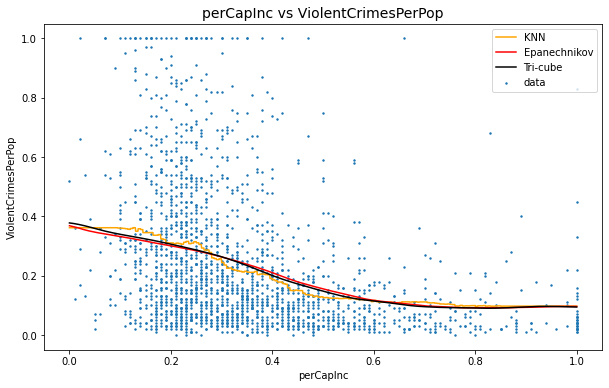

In [5]:
var = 'perCapInc'
X_dat = X[var].to_numpy()
x_real = np.linspace(0, 1, X_dat.shape[0])
y_dat = y.to_numpy()
y_hat_300_nearest = np.zeros(y_dat.shape)
y_hat_02_epa = np.zeros(y_dat.shape)
y_hat_02_tri = np.zeros(y_dat.shape)
for i in range(x_real.shape[0]):
    x0 = x_real[i]
    y_hat_300_nearest[i] = np.mean(y_dat[np.argsort(np.abs(X_dat - x0))][:300])
    t = np.abs(X_dat - x0)/0.2
    d = (t<=1)*3/4*(1-t**2) # kernel de Epanechnikov 
    d3 = (t<=1)*(1-t**3)**3 # kernel tricubico
    
    # Ponderacion mediante kernel Nadaraya-Watson
    y_hat_02_epa[i] = np.sum(d*y_dat)/np.sum(d)
    y_hat_02_tri[i] = np.sum(d3*y_dat)/np.sum(d3)
plt.figure(figsize=(10,6))
plt.plot(x_real, y_hat_300_nearest, label='KNN', color='orange')
plt.plot(x_real, y_hat_02_epa, label='Epanechnikov',color='red')
plt.plot(x_real, y_hat_02_tri, label='Tri-cube', color='black')
plt.scatter(X_dat, y_dat, s=2, label='data')
plt.title(var+' vs ViolentCrimesPerPop', fontsize=14)
plt.xlabel(var)
plt.ylabel('ViolentCrimesPerPop')
plt.legend()

Variable PctNotHSGrad: Porcentaje de individuos mayores de 25 años que no se han graduado de la secundaria

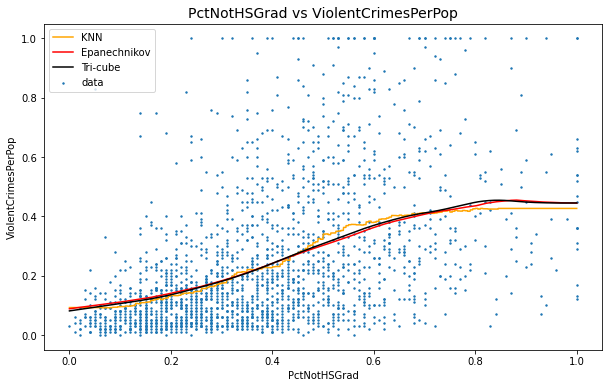

In [6]:
var = 'PctNotHSGrad'
X_dat = X[var].to_numpy()
x_real = np.linspace(0, 1, X_dat.shape[0])
y_dat = y.to_numpy()
y_hat_300_nearest = np.zeros(y_dat.shape)
y_hat_02_epa = np.zeros(y_dat.shape)
y_hat_02_tri = np.zeros(y_dat.shape)
for i in range(x_real.shape[0]):
    x0 = x_real[i]
    y_hat_300_nearest[i] = np.mean(y_dat[np.argsort(np.abs(X_dat - x0))][:300])
    t = np.abs(X_dat - x0)/0.2
    d = (t<=1)*3/4*(1-t**2) # kernel de Epanechnikov 
    d3 = (t<=1)*(1-t**3)**3 # kernel tricubico
    
    # Ponderacion mediante kernel Nadaraya-Watson
    y_hat_02_epa[i] = np.sum(d*y_dat)/np.sum(d)
    y_hat_02_tri[i] = np.sum(d3*y_dat)/np.sum(d3)
plt.figure(figsize=(10,6))
plt.plot(x_real, y_hat_300_nearest, label='KNN', color='orange')
plt.plot(x_real, y_hat_02_epa, label='Epanechnikov',color='red')
plt.plot(x_real, y_hat_02_tri, label='Tri-cube', color='black')
plt.scatter(X_dat, y_dat, s=2, label='data')
plt.title(var+' vs ViolentCrimesPerPop', fontsize=14)
plt.xlabel(var)
plt.ylabel('ViolentCrimesPerPop')
plt.legend()

Variable PctImmigRec10: Porcentaje de inmigrantes que han llegado en los últimos 10 años

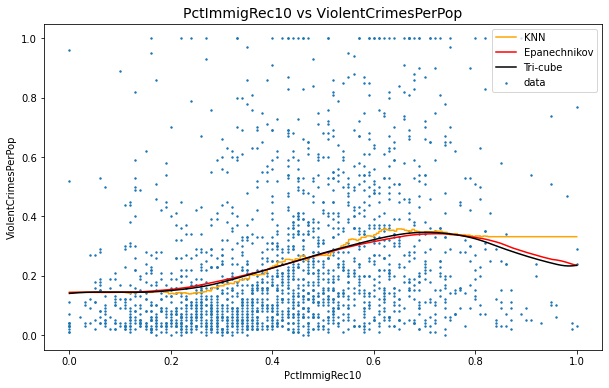

In [7]:
var = 'PctImmigRec10'
X_dat = X[var].to_numpy()
x_real = np.linspace(0, 1, X_dat.shape[0])
y_dat = y.to_numpy()
y_hat_300_nearest = np.zeros(y_dat.shape)
y_hat_02_epa = np.zeros(y_dat.shape)
y_hat_02_tri = np.zeros(y_dat.shape)
for i in range(x_real.shape[0]):
    x0 = x_real[i]
    y_hat_300_nearest[i] = np.mean(y_dat[np.argsort(np.abs(X_dat - x0))][:300])
    t = np.abs(X_dat - x0)/0.2
    d = (t<=1)*3/4*(1-t**2) # kernel de Epanechnikov 
    d3 = (t<=1)*(1-t**3)**3 # kernel tricubico
    
    # Ponderacion mediante kernel Nadaraya-Watson
    y_hat_02_epa[i] = np.sum(d*y_dat)/np.sum(d)
    y_hat_02_tri[i] = np.sum(d3*y_dat)/np.sum(d3)
plt.figure(figsize=(10,6))
plt.plot(x_real, y_hat_300_nearest, label='KNN', color='orange')
plt.plot(x_real, y_hat_02_epa, label='Epanechnikov',color='red')
plt.plot(x_real, y_hat_02_tri, label='Tri-cube', color='black')
plt.scatter(X_dat, y_dat, s=2, label='data')
plt.title(var+' vs ViolentCrimesPerPop', fontsize=14)
plt.xlabel(var)
plt.ylabel('ViolentCrimesPerPop')
plt.legend()

Observaciones: En los tres casos, los métodos de suavización mediante Kernel presentan resultados muy similares a los obtenidos mediante regresión polinómica y splines. Se observa que el suavizado usando K-Nearest-Neighbour retorna una curva bastante rugosa incluso con un alto número de vecinos ($k=300$). Un valor más bajo que este cae en el overfitting, y cualquiera ligeramente más alto presenta underfitting. Por otro lado, el uso de los kernels de Epanechnikov y el tri-cúbico encuentran modelos muy similares, con curvas prácticamente iguales. Nuevamente, se encuentra que la cantidad de crímenes violentos aumenta al disminuir el ingreso per capita, y también al aumentar el porcentaje de individuos sin terminar la educación básica. No es posible generalizar de esta manera con respecto al porcentaje de inmigrantes, pero se observa que, en la mayoría de los casos, la cantidad de crímenes violentos aumenta junto con este porcentaje, alcanzando un pico alrededor de `PctImmigRec10` = $0.7$. En este momento, la variable objetivo comienza a decaer.